ER - targeted: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


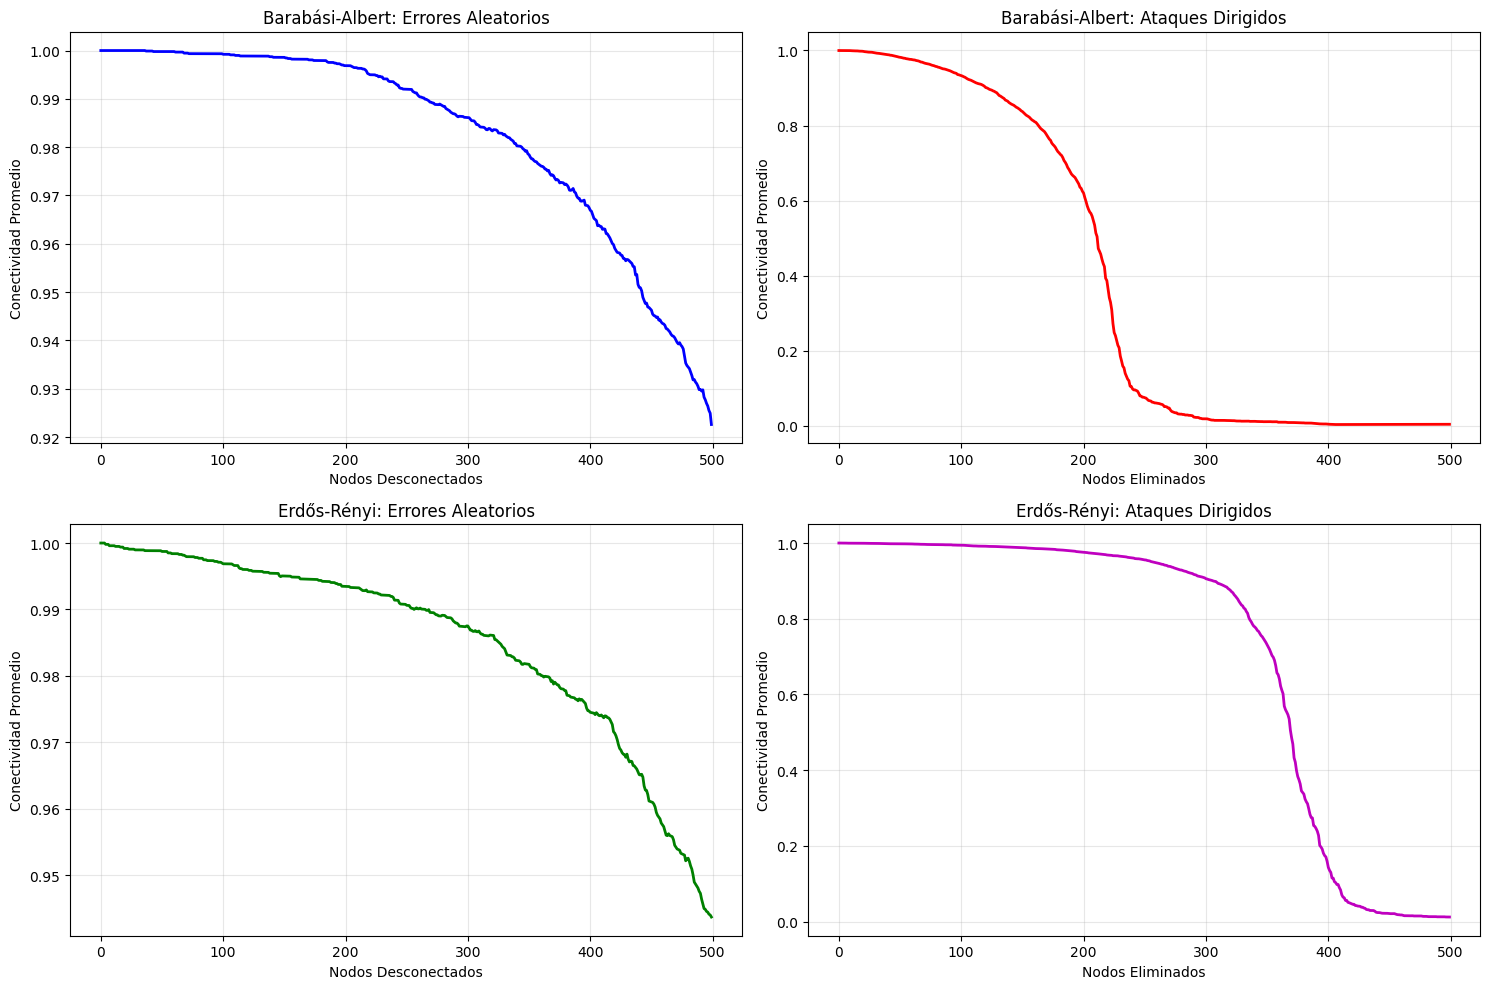

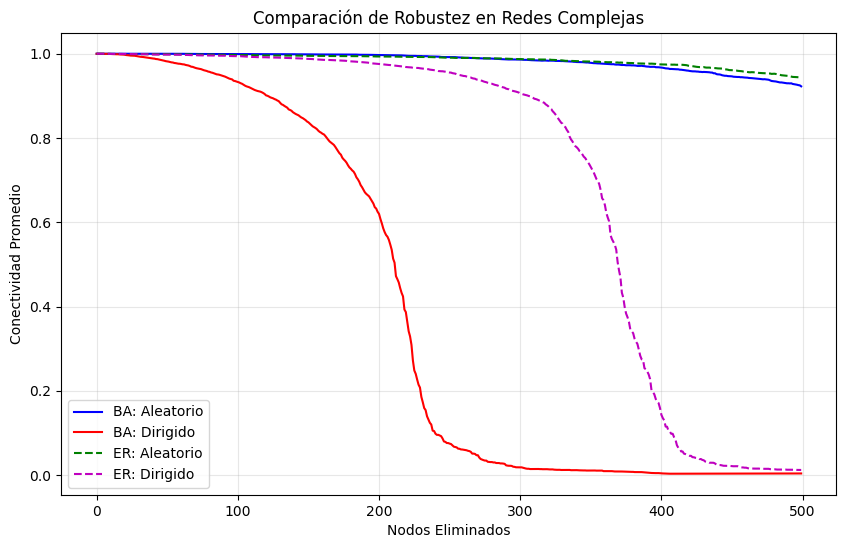

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Configuración de parámetros
N = 1000  # Número de nodos
m0 = 3    # Nodos iniciales (BA)
m = 3     # Conexiones por nuevo nodo (BA)
T = 10    # Réplicas de Montecarlo
p = 0.006 # Probabilidad de conexión (ER) - para grado medio ~6

# Función para simular desconexiones
def simulate_attacks(network_type, attack_type, T, removal_steps):
    connectivity = np.zeros((T, removal_steps))
    
    for rep in tqdm(range(T), desc=f"{network_type} - {attack_type}"):
        # Generar red
        if network_type == "BA":
            G = nx.barabasi_albert_graph(N, m, seed=rep)
        else:  # ER
            G = nx.erdos_renyi_graph(N, p, seed=rep, directed=False)
            G = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        
        nodes = list(G.nodes())
        
        for step in range(removal_steps):
            # Seleccionar nodo a eliminar
            if attack_type == "random":
                node = np.random.choice(nodes)
            else:  # "targeted"
                degrees = dict(G.degree())
                node = max(degrees, key=degrees.get)
            
            # Eliminar nodo y actualizar red
            G.remove_node(node)
            nodes.remove(node)
            
            # Calcular conectividad
            if G.number_of_nodes() > 0:
                largest_cc = max(nx.connected_components(G), key=len)
                connectivity[rep, step] = len(largest_cc) / G.number_of_nodes()
    
    return np.mean(connectivity, axis=0)

# Parámetros de simulación
removal_steps = 500  # Nodos a eliminar (50% de la red)

# Simulaciones
ba_random = simulate_attacks("BA", "random", T, removal_steps)
ba_targeted = simulate_attacks("BA", "targeted", T, removal_steps)
er_random = simulate_attacks("ER", "random", T, removal_steps)
er_targeted = simulate_attacks("ER", "targeted", T, removal_steps)

# Visualización
plt.figure(figsize=(15, 10))

# Redes Barabási-Albert
plt.subplot(2, 2, 1)
plt.plot(ba_random, 'b-', linewidth=2)
plt.title('Barabási-Albert: Errores Aleatorios')
plt.xlabel('Nodos Desconectados')
plt.ylabel('Conectividad Promedio')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(ba_targeted, 'r-', linewidth=2)
plt.title('Barabási-Albert: Ataques Dirigidos')
plt.xlabel('Nodos Eliminados')
plt.ylabel('Conectividad Promedio')
plt.grid(alpha=0.3)

# Redes Erdős-Rényi
plt.subplot(2, 2, 3)
plt.plot(er_random, 'g-', linewidth=2)
plt.title('Erdős-Rényi: Errores Aleatorios')
plt.xlabel('Nodos Desconectados')
plt.ylabel('Conectividad Promedio')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(er_targeted, 'm-', linewidth=2)
plt.title('Erdős-Rényi: Ataques Dirigidos')
plt.xlabel('Nodos Eliminados')
plt.ylabel('Conectividad Promedio')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('vulnerability_analysis.png', dpi=300)
plt.show()

# Comparación directa
plt.figure(figsize=(10, 6))
plt.plot(ba_random, 'b-', label='BA: Aleatorio')
plt.plot(ba_targeted, 'r-', label='BA: Dirigido')
plt.plot(er_random, 'g--', label='ER: Aleatorio')
plt.plot(er_targeted, 'm--', label='ER: Dirigido')
plt.title('Comparación de Robustez en Redes Complejas')
plt.xlabel('Nodos Eliminados')
plt.ylabel('Conectividad Promedio')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('comparison.png', dpi=300)
plt.show()